In [109]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('Final database.csv', low_memory=False)

df['Release_date'] = pd.to_datetime(df['Release_date'], errors='coerce')

emotion_cols = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust','negative','positive']
df = df[(df['Release_date'].dt.year >= 1990) & (df['Release_date'].dt.year <= 2000)]
df['Year'] = df['Release_date'].dt.year

df_90_1s = df.drop_duplicates(subset='Title')
df_90_2s = df.drop_duplicates(subset='Title')

df_90_1s_filtered = df_90_1s[['Title', 'Release_date', 'Year'] + emotion_cols]
df_90_2s_filtered = df_90_2s[['Title', 'Release_date', 'Year']  + emotion_cols]

Gráfico criterio 1

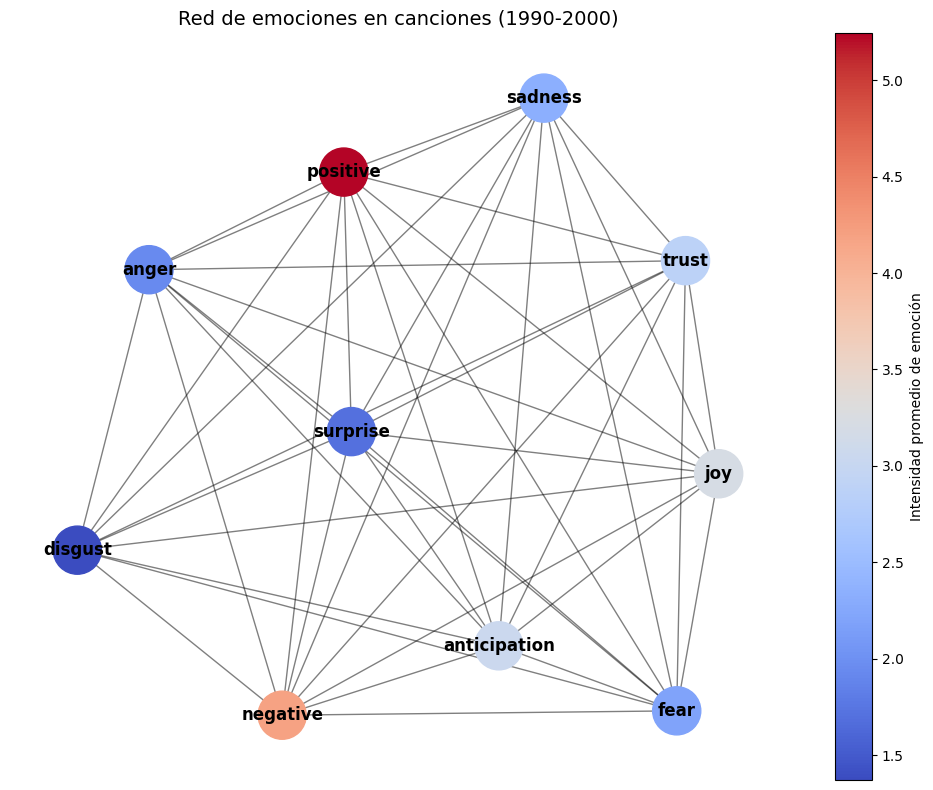

In [111]:
co_matrix = pd.DataFrame(0, index=emotion_cols, columns=emotion_cols)


for _, row in df_90_2s_filtered.iterrows():
    active = [emotion for emotion in emotion_cols if row[emotion] > 0]
    for i in range(len(active)):
        for j in range(i + 1, len(active)):
            co_matrix.loc[active[i], active[j]] += 1
            co_matrix.loc[active[j], active[i]] += 1

G = nx.from_pandas_adjacency(co_matrix)

mean_intensity = df_90_2s_filtered[emotion_cols].mean()
node_colors = [mean_intensity[emotion] for emotion in G.nodes()]

pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(10, 8))

nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='coolwarm', node_size=1200, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=12, font_weight='bold')

cbar = fig.colorbar(nodes, ax=ax)
cbar.set_label('Intensidad promedio de emoción')

ax.set_title('Red de emociones en canciones (1990-2000)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


Gráfico criterio 2

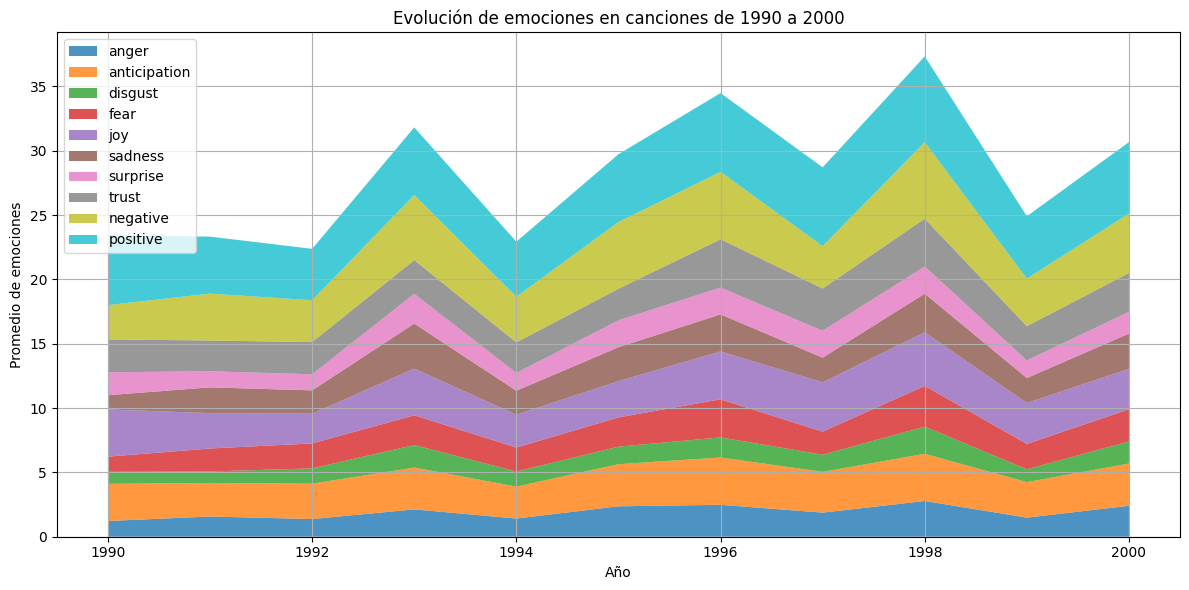

In [112]:
emotion_trends = df_90_2s_filtered.groupby('Year')[emotion_cols].mean()

plt.figure(figsize=(12, 6))
plt.stackplot(emotion_trends.index, emotion_trends.T, labels=emotion_cols, alpha=0.8)
plt.legend(loc='upper left')
plt.title('Evolución de emociones en canciones de 1990 a 2000')
plt.xlabel('Año')
plt.ylabel('Promedio de emociones')
plt.grid(True)
plt.tight_layout()
plt.show()